<h2 style="color:green">Regression w/Deep Learrning</h2>

<h4 style="color:white">import packages</h4>

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tlf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error


<h4 style="color:white">import data</h4>

In [5]:
df= pd.read_excel("Concrete_Data.xls")

<h4 style="color:white">EDA - Exploratory Data Analysis</h4>

In [7]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [8]:
x= df.drop(['Strength'],axis=1)
y= df[['Strength']]

<h4 style="color:white">Train test split</h4>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h4 style="color:white">standartization</h4>

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h4 style="color:white">Model</h4>

In [14]:
model= Sequential()
model.add(Dense(240,activation= "relu"))
model.add(Dense(120,activation= "relu"))
model.add(Dense(80,activation= "relu"))
model.add(Dense(64,activation= "relu"))
model.add(Dense(32,activation= "relu"))
model.add(Dense(16,activation= "relu"))
model.add(Dense(8,activation= "relu"))
model.add(Dense(2,activation= "relu"))
model.add(Dense(1))

In [15]:
model.compile(loss="mse", optimizer= "adam")

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1633.6980 - val_loss: 1473.3295
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1530.5032 - val_loss: 1387.8501
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1478.5886 - val_loss: 1148.1019
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1078.8903 - val_loss: 627.6785
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 559.8179 - val_loss: 309.8467
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 368.3925 - val_loss: 270.7492
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 270.0177 - val_loss: 244.0327
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 265.8825 - val_loss: 226.6317
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 235.8610 - val_loss: 206.7874
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 220.6037 - val_loss: 195.9041
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 198.5841 - val_loss: 190.4774
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━

In [17]:
pred= model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [18]:
r2_score(y_test,pred)

0.8746710347588048

In [19]:
loss_f= pd.DataFrame(history.history)

<Axes: >

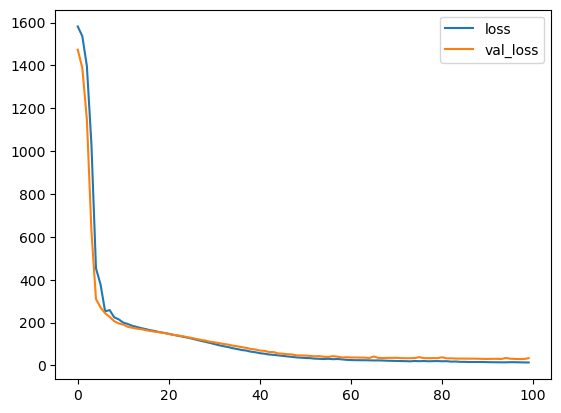

In [20]:
loss_f.plot()